In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

%matplotlib inline

# Load your dataset
data = pd.read_csv('C:/Users/bhara/Downloads/data/garments_worker_productivity.csv')




In [2]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
data.shape

(1197, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [7]:
data['wip'] = data['wip'].apply(lambda x: x if pd.notna(x) else np.nan)
data['wip_NaN'] = data['wip'].apply(lambda x: x if pd.isna(x) else np.nan)

In [8]:
data['wip'].fillna(0, inplace =True)

In [9]:
data.drop('wip_NaN', axis=1, inplace=True)

In [10]:
# 4. Remove extra spaces in department
data.department = data.department.str.strip()

In [11]:
data['date']=pd.to_datetime(data['date'])

In [12]:
data = pd.get_dummies(data, columns=['day'])


In [13]:
data = pd.get_dummies(data, columns=['quarter'])

In [14]:
data = pd.get_dummies(data, columns=['department'])

In [15]:
# Drop duplicate columns
data = data.loc[:, ~data.columns.duplicated()]


In [16]:
data.shape

(1197, 25)

In [17]:
data.head()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,day_Thursday,day_Tuesday,day_Wednesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing
0,2015-01-01,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2015-01-01,1,0.75,3.94,0.0,960,0,0.0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,2015-01-01,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,2015-01-01,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,2015-01-01,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   team                   1197 non-null   int64         
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   int64         
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  day_Monday             1197 non-null   uint8         
 13  day

C:\Users\bhara\AppData\Local\Temp\ipykernel_21608\4113345848.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


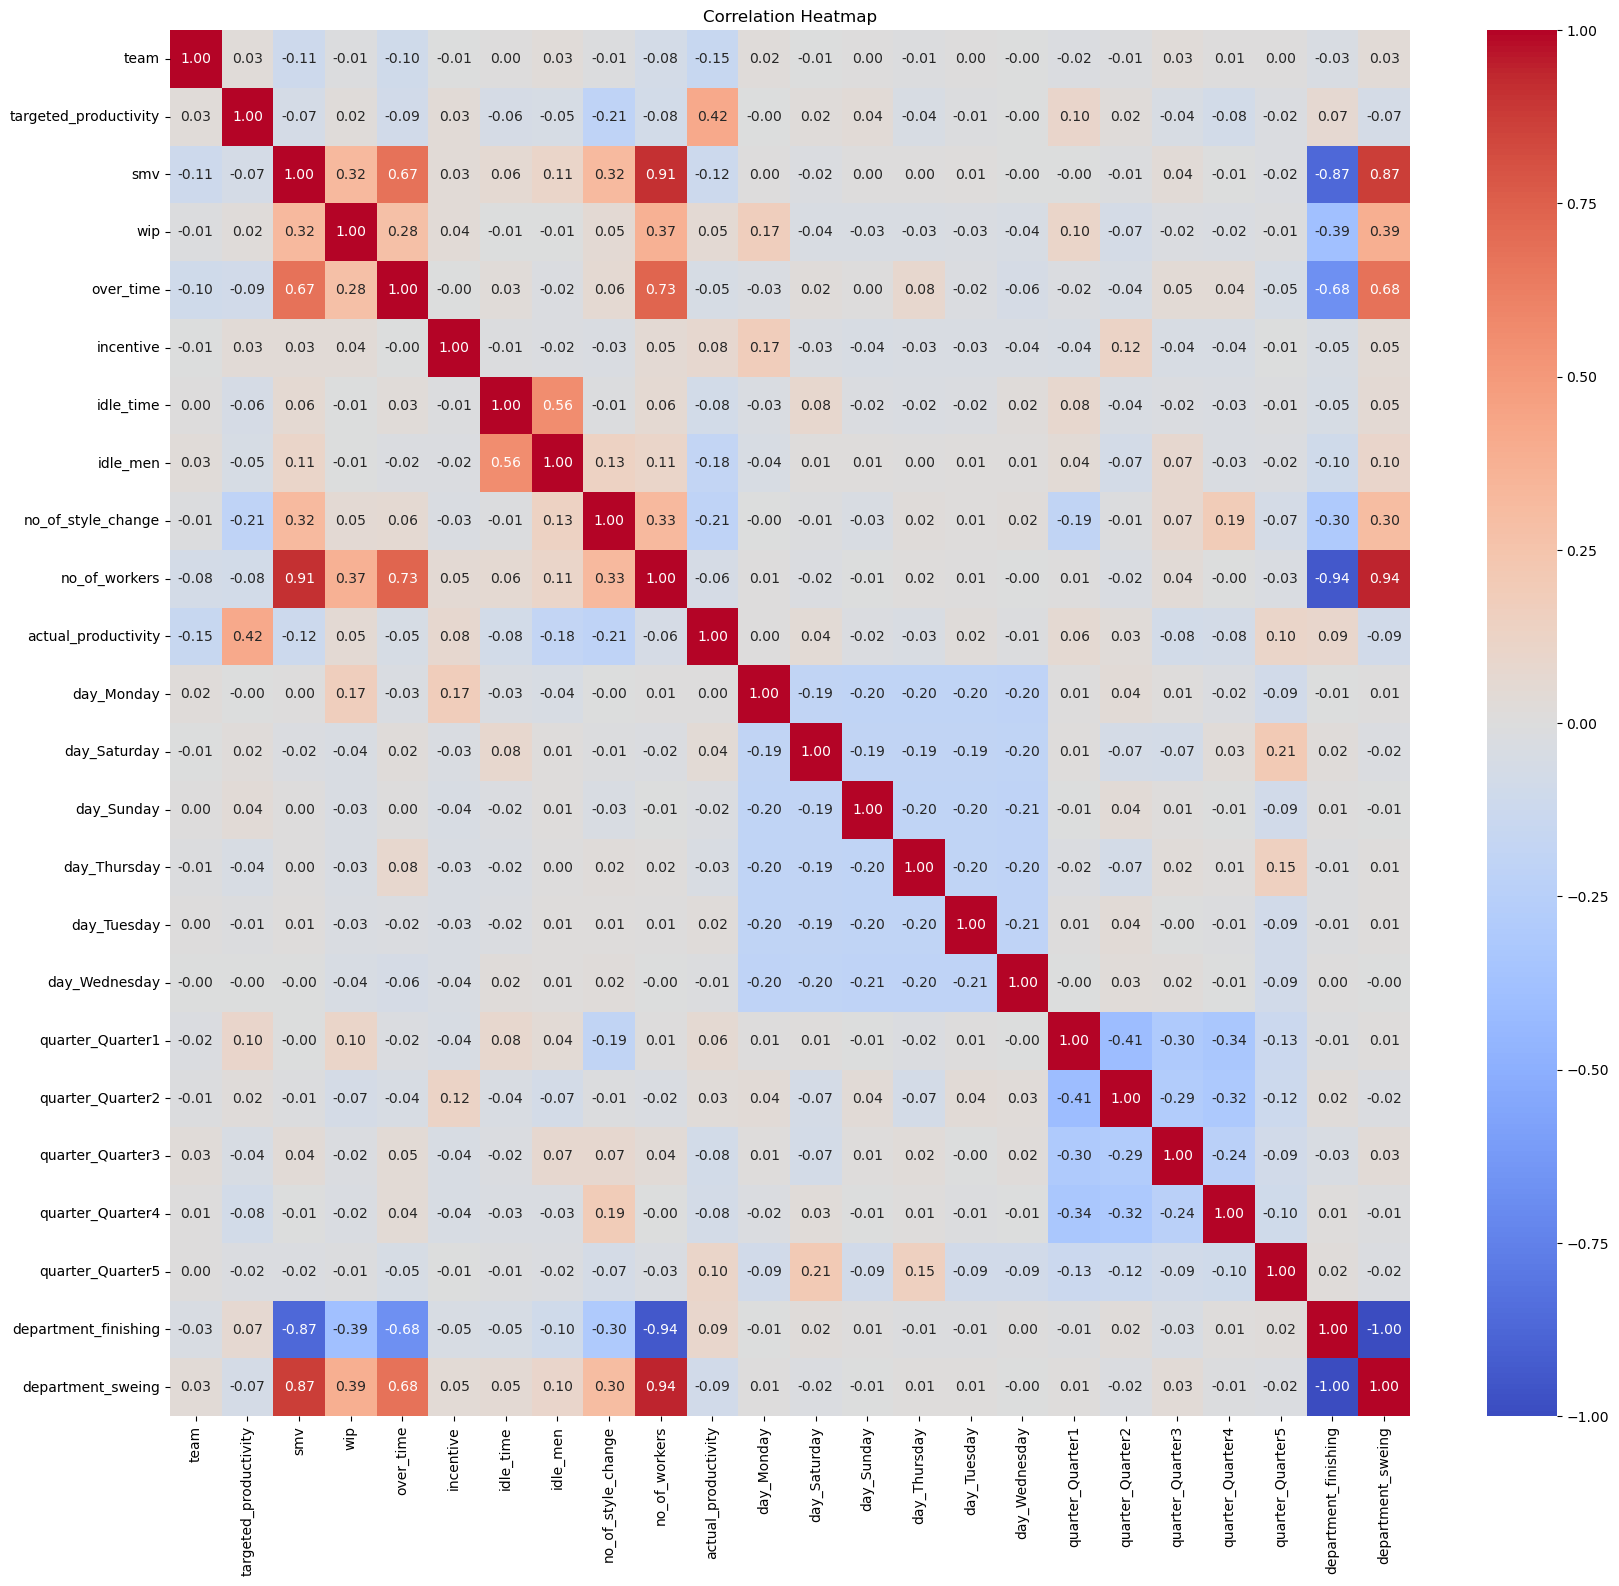

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [20]:
# Define features (X) and target variable (y)
X = data.drop(['actual_productivity', 'date'], axis = 1)  # Features
y = data['actual_productivity']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
print(X.shape)
print(y.shape)

(1197, 23)
(1197,)


In [22]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE) of Linear Regression Model : {mse}")
print(f"R-squared (R2) of Linear Regression Model: {r2}")

Mean Squared Error (MSE) of Linear Regression Model : 0.021943585593257334
R-squared (R2) of Linear Regression Model: 0.1735763766527343


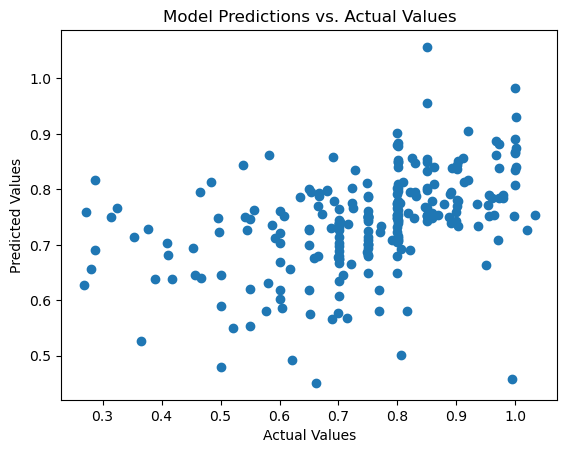

In [23]:

# Create a scatter plot to visualize predictions vs. actual values
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.show()


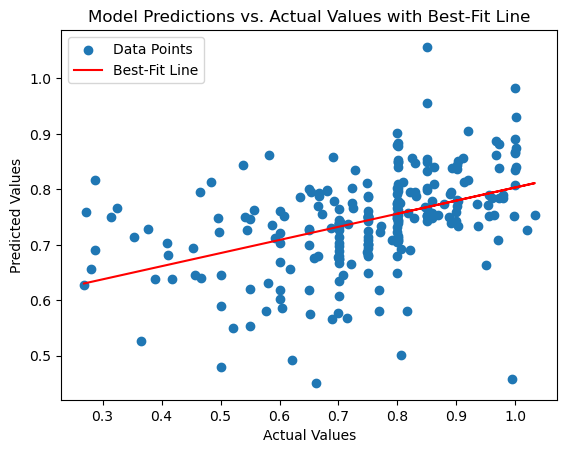

In [24]:
# Create a scatter plot of predictions vs. actual values
plt.scatter(y_test, y_pred_lr, label='Data Points')

# Calculate the slope and intercept for the best-fit line
slope, intercept = np.polyfit(y_test, y_pred_lr, 1)

# Create the best-fit line
best_fit_line = slope * y_test + intercept

# Plot the best-fit line
plt.plot(y_test, best_fit_line, color='red', label='Best-Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values with Best-Fit Line")
plt.legend()
plt.show()

In [25]:
# Create a Ridge Regression model with a specified alpha (regularization strength)
alpha = 0.7  # You can adjust this value
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE)of Ridge Model: {mse}")
print(f"R-squared (R2)of Ridge Model:: {r2}")

Mean Squared Error (MSE)of Ridge Model: 0.021928071655237868
R-squared (R2)of Ridge Model:: 0.17416065148858295


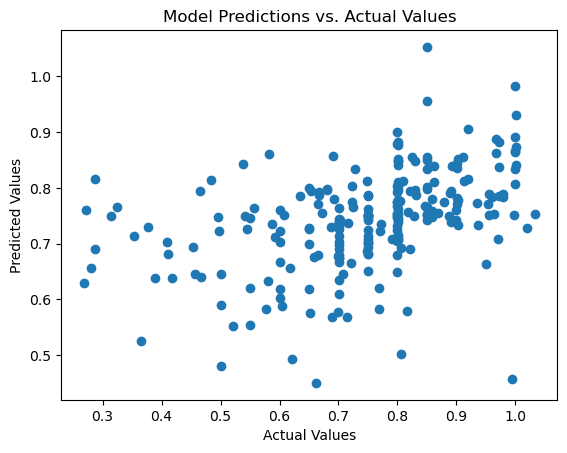

In [26]:
# Create a scatter plot to visualize predictions vs. actual values
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.show()


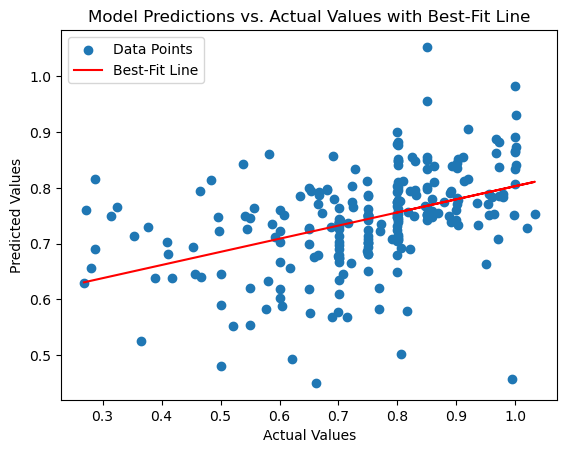

In [27]:
# Create a scatter plot of predictions vs. actual values
plt.scatter(y_test, y_pred_ridge, label='Data Points')

# Calculate the slope and intercept for the best-fit line
slope, intercept = np.polyfit(y_test, y_pred_ridge, 1)

# Create the best-fit line
best_fit_line = slope * y_test + intercept

# Plot the best-fit line
plt.plot(y_test, best_fit_line, color='red', label='Best-Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values with Best-Fit Line")
plt.legend()
plt.show()

In [28]:
alpha = 0  # You can adjust this value
model = Lasso(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (MSE)of Lasso Model: {mse}")
print(f"R-squared (R2)of Lasso Model: {r2}")

Mean Squared Error (MSE)of Lasso Model: 0.021943585593257337
R-squared (R2)of Lasso Model: 0.17357637665273418


C:\Users\bhara\AppData\Local\Temp\ipykernel_21608\595615444.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+01, tolerance: 3.001e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


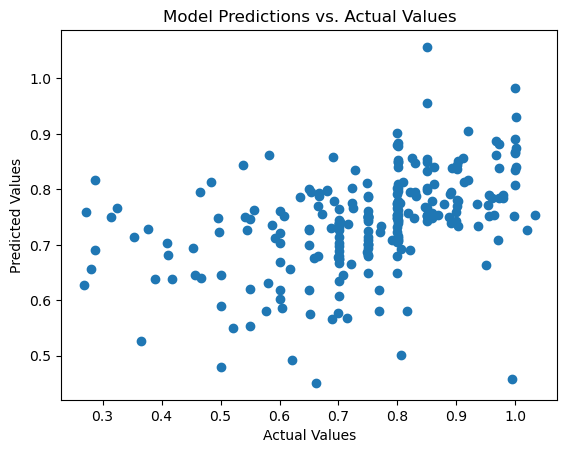

In [29]:
# Create a scatter plot to visualize predictions vs. actual values
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.show()


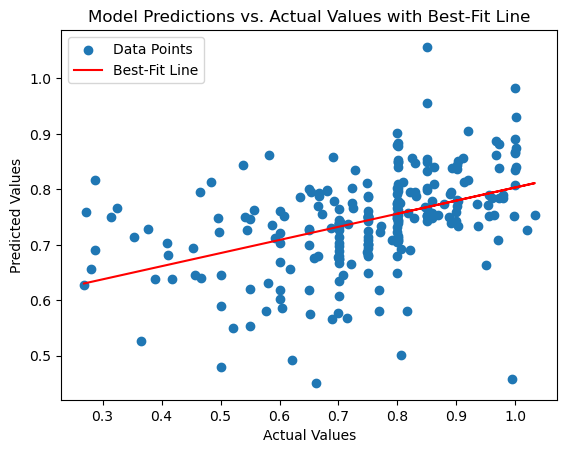

In [30]:
# Create a scatter plot of predictions vs. actual values
plt.scatter(y_test, y_pred_lasso, label='Data Points')

# Calculate the slope and intercept for the best-fit line
slope, intercept = np.polyfit(y_test, y_pred_lasso, 1)

# Create the best-fit line
best_fit_line = slope * y_test + intercept

# Plot the best-fit line
plt.plot(y_test, best_fit_line, color='red', label='Best-Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values with Best-Fit Line")
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error of RandomForest Model: {mse}')
print(f'Root Mean Squared Error of RandomForest Model: {rmse}')
print(f'R-squared (R2) of RandomForest Model: {r2}')


Mean Squared Error of RandomForest Model: 0.012209698273025009
Root Mean Squared Error of RandomForest Model: 0.11049750346964862
R-squared (R2) of RandomForest Model: 0.5401670778056126


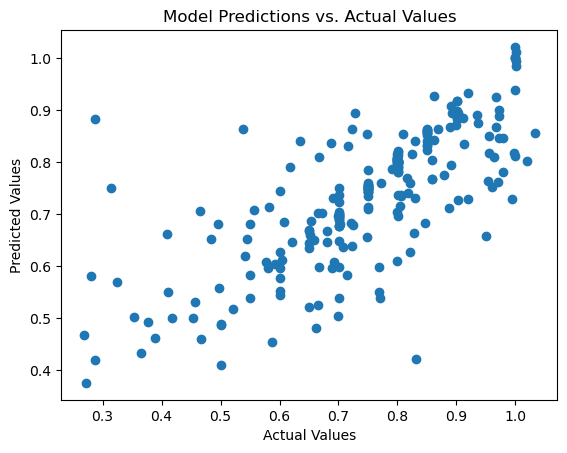

In [33]:
# Create a scatter plot to visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.show()


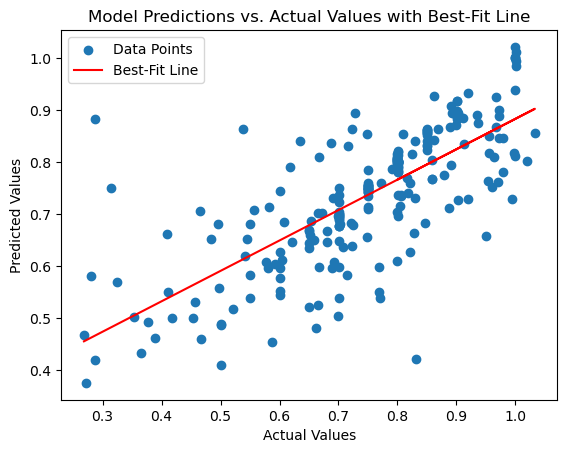

In [34]:
# Create a scatter plot of predictions vs. actual values
plt.scatter(y_test, y_pred, label='Data Points')

# Calculate the slope and intercept for the best-fit line
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Create the best-fit line
best_fit_line = slope * y_test + intercept

# Plot the best-fit line
plt.plot(y_test, best_fit_line, color='red', label='Best-Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values with Best-Fit Line")
plt.legend()
plt.show()

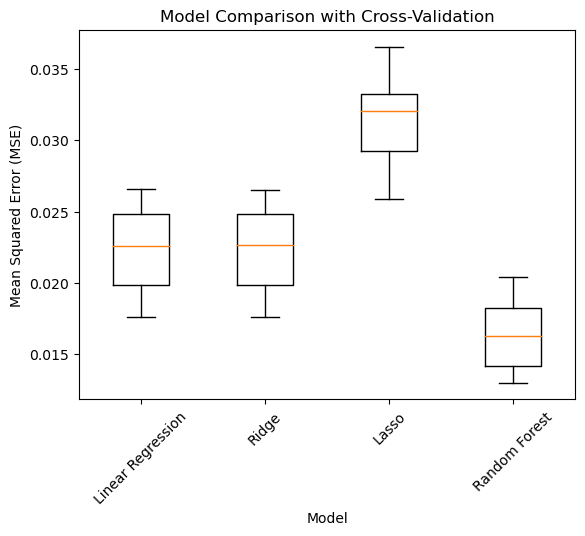

In [35]:
# Create models dictionary
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(), "Lasso": Lasso(), "Random Forest": RandomForestRegressor()}

results = []

# Loop through the models
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
  mse_results = -cv_results  # Convert negative MSE scores to positive
  results.append(mse_results)

# Create a box plot to visualize cross-validation results
plt.boxplot(results, labels=models.keys())
plt.title("Model Comparison with Cross-Validation")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=50, random_state=42)

model.fit(X, y)

# Define the features for prediction
features = {
    'team': 8,
    'targeted_productivity': 0.80,
    'smv': 26.16,
    'wip': 1108.0,
    'over_time': 7080,
    'incentive': 98,
    'idle_time': 0.0,
    'idle_men': 0,
    'no_of_style_change': 0,
    'no_of_workers': 59.0,
    'day_Monday': 0,
    'day_Saturday': 1,
    'day_Sunday': 0,
    'day_Thursday': 0,
    'day_Tuesday': 0,
    'day_Wednesday': 0,
    'department_finishing': 0,
    'department_finishing': 1,
    'department_sweing': 0,  
    'quarter_Quarter1': 0,
    'quarter_Quarter2': 1,  
    'quarter_Quarter3': 0,
    'quarter_Quarter4': 0,
    'quarter_Quarter5': 0
}

# Make a prediction
productivity = model.predict([list(features.values())])
print(productivity)





[0.94382357]


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: >

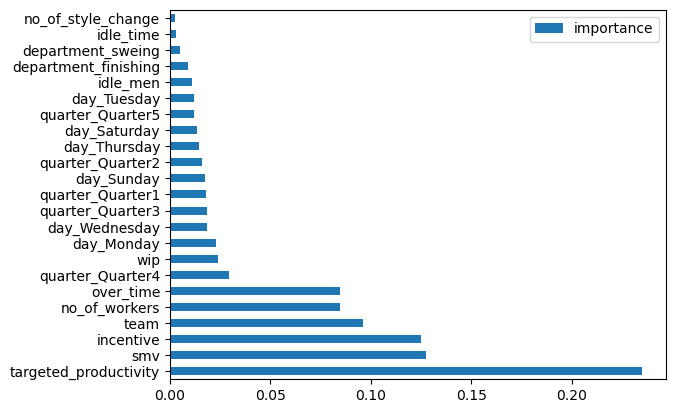

In [38]:

feat_importance = pd.DataFrame(model.feature_importances_, X.columns, columns=["importance"])
feat_importance.sort_values("importance", ascending=False).plot.barh()